# Introducing the dataset

## Plot the raw values of the most expensive stocks' companies over time

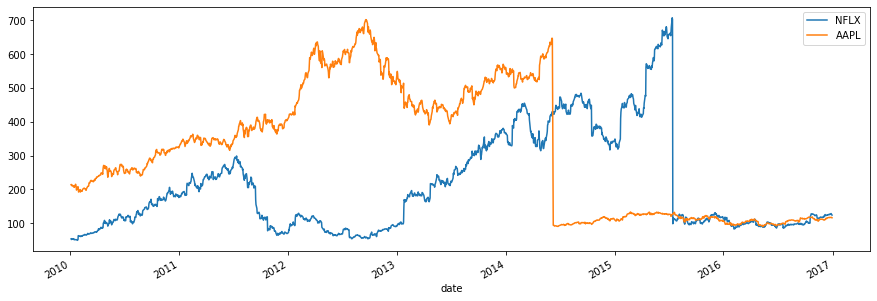

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
# Read in the data
data = pd.read_csv('/home/pitu/Documents/jupyter/data/prices/prices.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)

# Loop through each column, plot its values over time
fig, ax = plt.subplots(figsize=(15, 5))
for stk in data.sort_values(by=['close'],ascending=False).symbol.unique()[:2]:
    data[data['symbol'] == stk]['close'].plot(ax=ax, label=stk)
ax.legend()
plt.show()

## Scatter Plot

[Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), Text(0.5, 1.0, 'Color = time')]

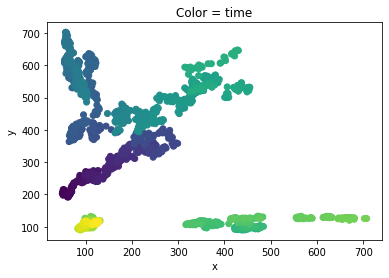

In [9]:
fig, ax = plt.subplots()

nflx = data[data['symbol']=='NFLX']['close']
aapl = data[data['symbol']=='AAPL']['close']

ax.scatter(nflx, aapl, c=np.arange(len(nflx)), cmap='viridis')
ax.set(xlabel='x', ylabel='y', title='Color = time')

# Fitting a simple regression model
Let's use data from several companies to predict the value of a test company. You'll attempt to predict the value of the Apple stock price using the values of NVidia, Ebay, and Yahoo.

In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
data.dropna(inplace=True)
# Use stock symbols to extract training data
x = np.hstack([np.asarray(data[data['symbol']== 'EBAY']['close']).reshape(-1,1),np.asarray(data[data['symbol']== 'NVDA']['close']).reshape(-1,1),np.asarray(data[data['symbol']== 'YHOO']['close']).reshape(-1,1)])

X = pd.DataFrame(data=x,columns=["EBAY","NVDA","YHOO"])

y = data[data['symbol']=="AAPL"]['close'].values

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=4)
print(scores)

[-4.19053153e+00 -3.04585903e-01  9.20620185e-02 -8.75266563e+02]


# Visualizing predicted values

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=.8, shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

-3308.6687638451695
